# 47 全排列Ⅱ
输入：可能含有重复数字的序列nums
输出：所有不重复的全排列（可以按任意顺序返回）  

## 思路
输出不能重复，需要考虑去重

**去重一定要对元素进行排序**  
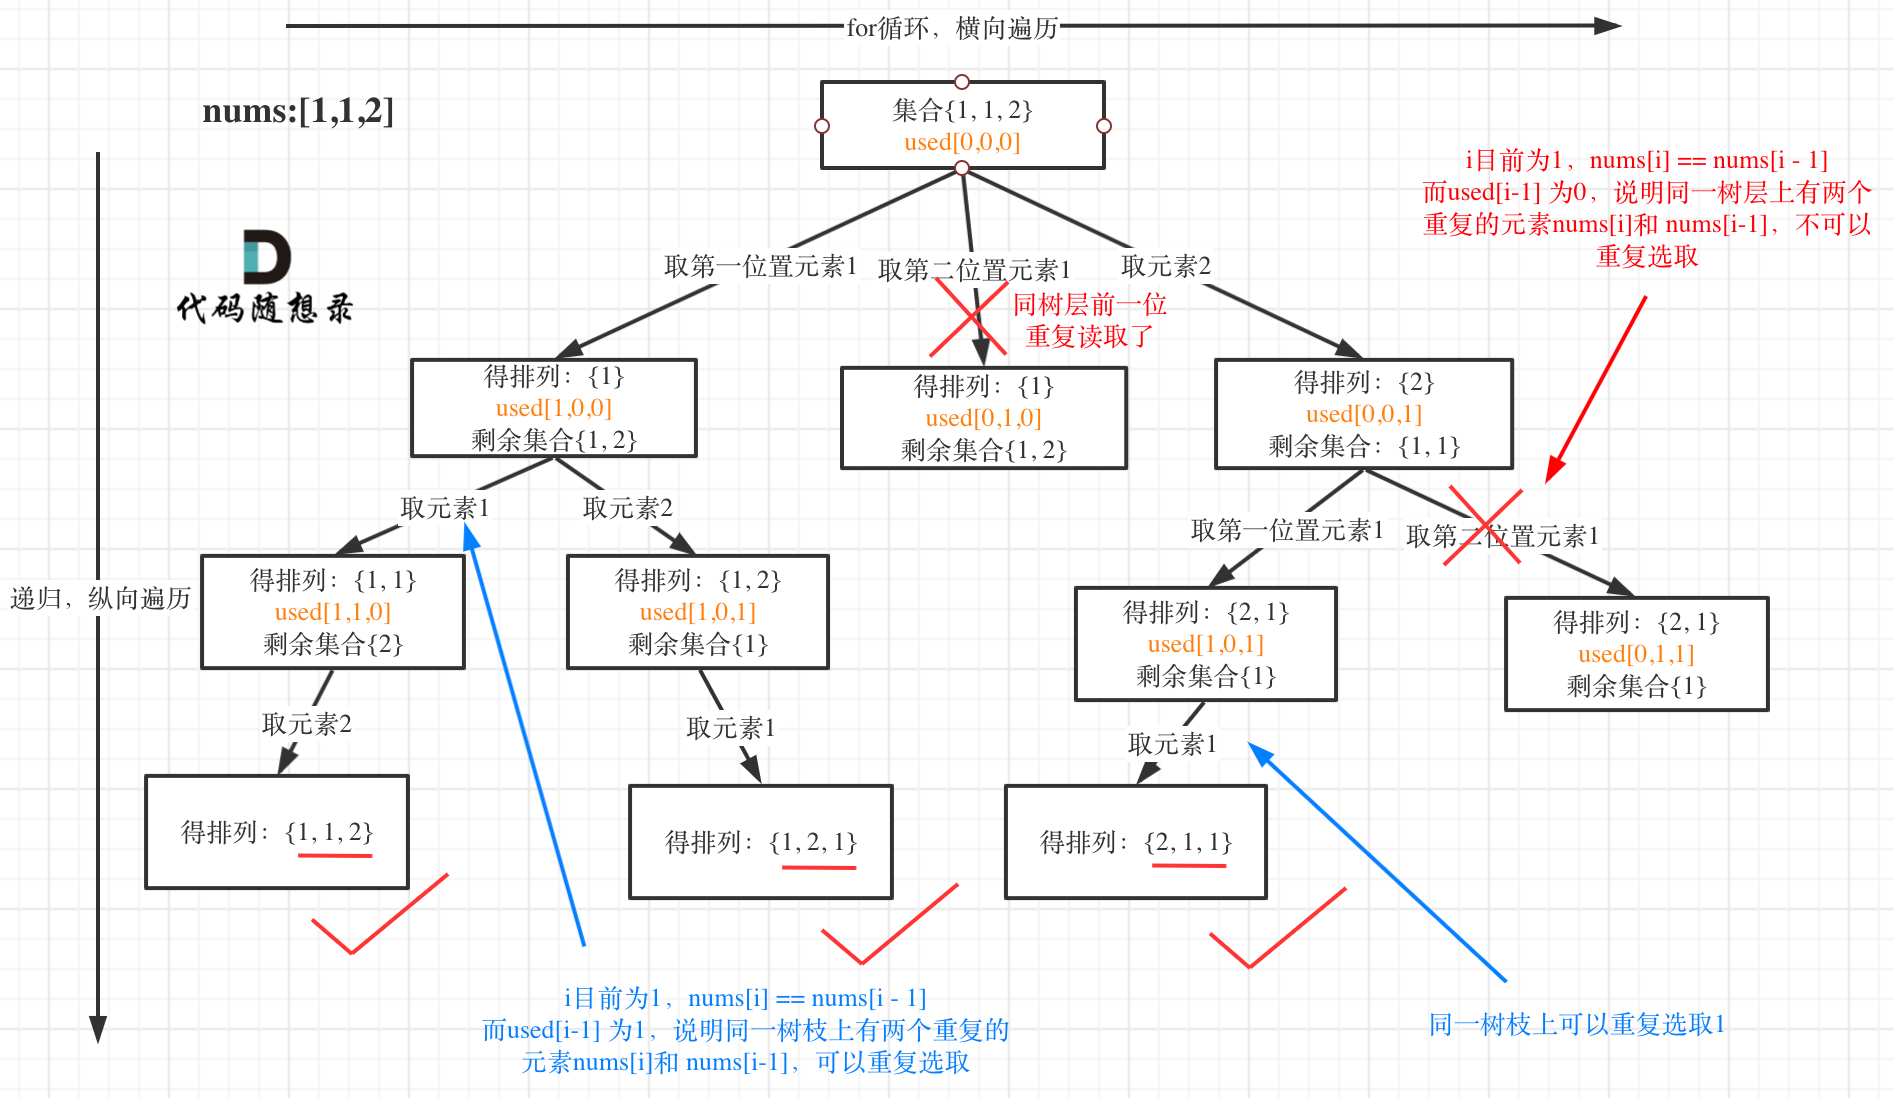

去重原则：同一树层上不能重复选取，同一树枝上可以重复选取

**一般来说：组合问题和排列问题是在树形结构的叶子节点上收集结果，而子集问题就是取树上所有节点的结果。**

In [ ]:
class Solution:
    def permuteUnique(self, nums):
        nums.sort()  # 去重先排序
        result = []
        self.backtracing(nums, [], [False]*len(nums), result)
        return result
    
    def backtracing(self, nums, path, used, result):
        if len(path) == len(nums):
            result.append(path[:])
            return
        
        for i in range(len(nums)):
            # 当前元素和上一个元素相同且上一个元素没被用过（树层重复），直接跳过判断下一个
            # 当前已经被用过了也要跳过
            if (i>0 and nums[i] == nums[i-1] and not used[i-1]) or used[i]:
                continue
            used[i] = True
            path.append(nums[i])
            self.backtracing(nums, path, used, result)
            path.pop()
            used[i] = False